## Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn as sb


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


## Loading the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [5]:
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']

In [6]:
X.shape

(400, 2)

In [7]:
y.shape

(400,)

In [8]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [10]:
dataset[dataset['Purchased'] == 1]

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
16,15733883,Male,47,25000,1
17,15617482,Male,45,26000,1
18,15704583,Male,46,28000,1
19,15621083,Female,48,29000,1
...,...,...,...,...,...
393,15635893,Male,60,42000,1
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1


## Print count of each label in Purchased column

In [11]:
y.value_counts()



0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [12]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

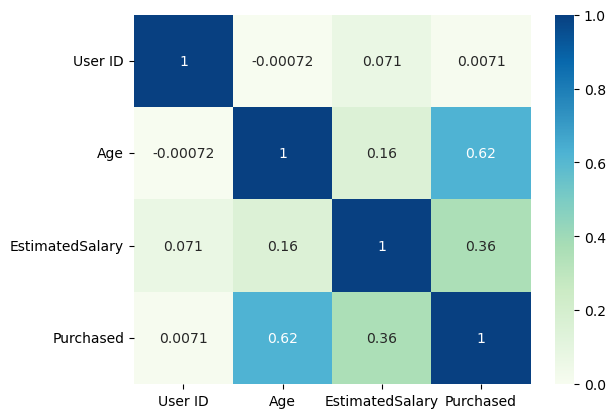

In [13]:
dataplot = sb.heatmap(dataset.corr(), cmap="GnBu", annot=True)
dataplot


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


## Train the model with random_state = 0

In [15]:
X_train.shape

(300, 2)

In [16]:
X_test.head()

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000


In [17]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel

LogisticRegression()

## Print the prediction results

In [18]:
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
146    1
135    0
390    1
264    1
364    1
Name: Purchased, Length: 100, dtype: int64

## Create dataframe with the Actual Purchased and Predict Purchased

In [27]:
newcol=X_test.copy()
newcol

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
146,27,96000
135,23,63000
390,48,33000
264,48,90000


In [21]:
test_dataset = pd.DataFrame(newcol)
test_dataset['Actual Purchased']= y_test
test_dataset['Predict Purchased']= y_pred
test_dataset

,Age,EstimatedSalary,Actual Purchased,Predict Purchased
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,1,0
135,23,63000,0,0
390,48,33000,1,0
264,48,90000,1,0


In [22]:
(test_dataset['Actual Purchased'] == test_dataset['Predict Purchased']).value_counts()


True     68
False    32
dtype: int64

In [23]:
#y_test
#y_pred


## Print Confusion Matrix and classification_report

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#classification_report
print(classification_report(y_test,y_pred))

#Confusion Matrix
print(confusion_matrix(y_test,y_pred))

#accuracy_score
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100

[[68  0]
 [32  0]]
0.68


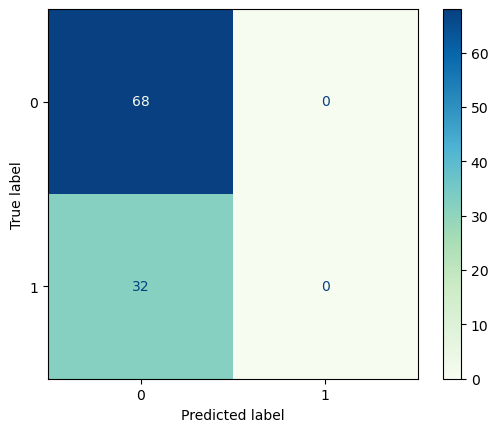

In [28]:
plot_confusion_matrix(logmodel,newcol, y_test, cmap='GnBu');
plt.show()

## Use StandardScaler() to improved performance and re-train your model

In [29]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
 
x_train_scaled=sc.fit_transform(X_train)
x_train_scaled[:5]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [30]:
x_test_scaled=sc.transform(X_test)
x_test_scaled[:5]

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ]])

## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [39]:
new_input=[[30,90000]]
new_output= logmodel.predict(new_input)
print(new_input,new_output)

[[30, 90000]] [0]


In [35]:
try:
    pred1 = int(input('Enter your age :' )) 
    pred2 = int(input('Salary:' ))
    
except ValueError:
    print("Invalid data")
    
    
newresult= logmodel.predict([[pred1, pred2]])
print('new result',newresult)

Enter your age :30
Salary:90000
new result [0]


In [41]:
df = X_test.append({'Age': 30, 'EstimatedSalary':90000}, ignore_index=True)
df.tail()


,Age,EstimatedSalary
96,23,63000
97,48,33000
98,48,90000
99,42,104000
100,30,90000


In [42]:
new_result= logmodel.predict(df)
print('new result',new_result, sep = ' ' )

new result [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [40]:
new_input=[[40,90000]]
new_output= logmodel.predict(new_input)
print(new_input,new_output)

[[40, 90000]] [0]


In [36]:
try:
    pred1 = int(input('Enter your age :' )) 
    pred2 = int(input('Salary:' ))
    
except ValueError:
    print("Invalid data")
    
    
newresult= logmodel.predict([[pred1, pred2]])
print('new result',newresult)

Enter your age :40
Salary:90000
new result [0]


In [43]:
df = X_test.append({'Age': 40, 'EstimatedSalary':90000}, ignore_index=True)
df.tail()


,Age,EstimatedSalary
96,23,63000
97,48,33000
98,48,90000
99,42,104000
100,40,90000


In [44]:
new_result= logmodel.predict(df)
print('new result',new_result, sep = ' ' )

new result [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
